In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## **1. Background Story**

New York City Taxi and Limousine Commission (TLC) dibentuk pada tahun 1971, adalah badan yang bertanggung jawab atas perizinan dan pengaturan Medallion (Yellow) taxi cabs di Kota New York untuk kendaraan sewaan (liveries berbasis komunitas, mobil hitam, dan limusin mewah), mobil komuter, dan kendaraan paratransit.
Lebih dari 200.000 pemegang lisensi TLC menyelesaikan sekitar 1.000.000 perjalanan setiap harinya.

New York City TLC trip record adalah kumpulan data yang memberikan informasi terperinci tentang perjalanan yang dilakukan dengan taksi, kendaraan sewaan (seperti Uber dan Lyft), dan kendaraan lain yang diatur oleh TLC di New York City.

New York City Taxi (TLC) trip record ingin mengetahui lebih lanjut tentang pola perjalanan tamu mereka, termasuk distribusi waktu perjalanan, jumlah penumpang, metode pembayaran, dan pola perjalanan berdasarkan lokasi pickup dan dropoff. Analisis ini akan membantu New York City Taxi and Limousine Commission (TLC) meningkatkan layanan transportasi mereka dan menyesuaikan strategi operasional berdasarkan kebutuhan tamu.


# Pertanyaan dan metodologi

1. Bagaimana distribusi perjalanan berdasarkan waktu pickup?

- Langkah 1: Tunjukkan distribusi perjalanan berdasarkan hari dalam minggu.
- Langkah 2: Tunjukkan distribusi perjalanan berdasarkan jam dalam sehari.
- Langkah 3: Tunjukkan kombinasi hari dan jam untuk melihat waktu puncak penggunaan transportasi.

2. Adakah korelasi antara jumlah penumpang dan jarak perjalanan?

- Langkah 1: Tunjukkan distribusi jumlah penumpang.
- Langkah 2: Tunjukkan median jarak perjalanan berdasarkan jumlah penumpang.
- Langkah 3: Lakukan uji korelasi non-parametrik dan tunjukkan garis regresi untuk melihat hubungan antara jumlah penumpang dan jarak perjalanan.

3. Bagaimana distribusi biaya perjalanan (fare_amount) berdasarkan metode pembayaran?

- Langkah 1: Tunjukkan distribusi biaya perjalanan berdasarkan metode pembayaran.
- Langkah 2: Tunjukkan median biaya perjalanan berdasarkan metode pembayaran.
- Langkah 3: Lakukan uji statistik non-parametrik untuk melihat perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran.

4. Bagaimana pola perjalanan berdasarkan lokasi pickup dan dropoff?

- Langkah 1: Tunjukkan top 10 lokasi pickup.
- Langkah 2: Tunjukkan top 10 lokasi dropoff.
- Langkah 3: Tunjukkan distribusi kombinasi lokasi pickup dan dropoff.

5. Apakah terdapat perbedaan signifikan dalam tarif perjalanan (fare_amount) berdasarkan lokasi pickup?

- Langkah 1: Tunjukkan distribusi tarif perjalanan berdasarkan lokasi pickup untuk top 10 dan bottom 10 lokasi.
- Langkah 2: Lakukan uji statistik non-parametrik untuk menentukan perbedaan signifikan dalam tarif perjalanan berdasarkan lokasi pickup.

## **2. Data Cleaning**

# *buka dataset*

In [2]:
df = pd.read_csv("NYC TLC Trip Record.csv")
# Menampilkan nama kolom untuk memastikan kolom `Passenger_count` ada
print(df.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


In [3]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [4]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

# *Menampilkan Deskripsi Awal Dataset*
Kita akan melihat deskripsi statistik awal dari dataset, persentase nilai NaN, dan tipe data untuk setiap kolom.

In [5]:
# Deskripsi statistik awal
initial_description = df.describe(include='all').transpose()

# Persentase nilai NaN
nan_percentage = (df.isna().mean() * 100).to_frame(name='NaN Percentage')

# Tipe data setiap kolom
dtypes_initial = df.dtypes.to_frame(name='Data Types')

# Menggabungkan deskripsi, persentase NaN, dan tipe data dalam satu DataFrame
initial_summary = initial_description.join(nan_percentage).join(dtypes_initial)

# Menampilkan hasil dalam format tabel
initial_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,NaN Percentage,Data Types
VendorID,68211.0,NaN,NaN,NaN,1.863028,0.34382,1.0,2.0,2.0,2.0,2.0,0.000000,int64
lpep_pickup_datetime,68211,66575,2023-01-07 23:58:06,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
lpep_dropoff_datetime,68211,66519,2023-01-06 00:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
store_and_fwd_flag,63887,2,N,63579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.339154,object
RatecodeID,63887.0,NaN,NaN,NaN,1.11716,1.372913,1.0,1.0,1.0,1.0,99.0,6.339154,float64
PULocationID,68211.0,NaN,NaN,NaN,98.549735,61.244314,1.0,74.0,75.0,129.0,265.0,0.000000,int64
DOLocationID,68211.0,NaN,NaN,NaN,138.429901,76.761311,1.0,74.0,138.0,219.0,265.0,0.000000,int64
passenger_count,63887.0,NaN,NaN,NaN,1.31587,0.979054,0.0,1.0,1.0,1.0,9.0,6.339154,float64
trip_distance,68211.0,NaN,NaN,NaN,8.114852,585.105955,0.0,1.11,1.85,3.21,120098.84,0.000000,float64
fare_amount,68211.0,NaN,NaN,NaN,16.603545,13.470121,-70.0,9.3,13.5,19.8,490.0,0.000000,float64


1. VendorID : A code indicating the LPEP provider that provided
the record.
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc.
2. lpep_pickup_datetime : The date and time when the meter was engaged.
3. lpep_dropoff_datetime : The date and time when the meter was
disengaged.
4. Passenger_count :The number of passengers in the vehicle.
This is a driver-entered value.
5. Trip_distance: The elapsed trip distance in miles was reported by
the taximeter.
6. PULocationID :TLC Taxi Zone in which the taximeter was engaged.
7. DOLocationID :TLC Taxi Zone in which the taximeter was
disengaged.
8. RateCodeID :The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 =JFK
    - 3 =Newark
    - 4 =Nassau or Westchester
    - 5 =Negotiated fare
    - 6 =Group ride
9. Store_and_fwd_flag :This flag indicates whether the trip record was held
in the vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did
not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip
10. Payment_type: A numeric code signifying how the passenger paid
for the trip.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
11. Fare_amount :The time-and-distance fare is calculated by the
meter. Extra Miscellaneous extras and surcharges.
Currently, this only includes the $0.50 and $1 rush
hour and overnight charges.
12. MTA_tax :$0.50 MTA tax that is automatically triggered based
on the metered rate in use.
13. Improvement_surcharge :$0.30 improvement surcharge assessed on hailed
trips at the flag
drop. The improvement surcharge began being
levied in 2015.
14. Tip_amount : This field is automatically populated for credit card
tips. Cash tips are not included.
15. Tolls_amount : The total amount of all tolls paid in the trip.
16. Total_amount : The total amount charged to passengers. Does not
include cash tips.
17. Trip_type : A code indicating whether the trip was a street hail
or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.
    - 1 = Street-hail
    - 2 = Dispatch

# *Menghapus Kolom ehail_fee*
Kolom ehail_fee dihapus karena semua nilainya adalah NaN dan tidak memberikan informasi yang berguna untuk analisis kita.

In [6]:
# Menghapus kolom ehail_fee
df_cleaned = df.drop(columns=['ehail_fee'])

# *Menghapus Baris dengan Nilai Hilang*
Menghapus semua baris yang mengandung nilai hilang untuk memastikan bahwa data yang kita analisis lengkap dan akurat.

In [7]:
# Menghapus baris dengan nilai hilang
df_cleaned = df_cleaned.dropna()

# *Memastikan Tipe Data yang Sesuai*
Memastikan bahwa kolom memiliki tipe data yang sesuai untuk analisis, seperti mengonversi kolom tanggal ke format datetime dan kolom numerik ke format yang sesuai.

In [8]:
# Mengonversi tipe data
df_cleaned['lpep_pickup_datetime'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime'])
df_cleaned['lpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['lpep_dropoff_datetime'])
df_cleaned['passenger_count'] = df_cleaned['passenger_count'].astype(int)
df_cleaned['trip_distance'] = df_cleaned['trip_distance'].astype(float)


# *Breakdown kolom datetime*

In [9]:
# Ensure datetime format for the pickup datetime column
df_cleaned['lpep_pickup_datetime'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime'])

# Create new columns for day, week, month, and year
df_cleaned['pickup_day'] = df_cleaned['lpep_pickup_datetime'].dt.day
df_cleaned['pickup_week'] = df_cleaned['lpep_pickup_datetime'].dt.isocalendar().week
df_cleaned['pickup_month'] = df_cleaned['lpep_pickup_datetime'].dt.month
df_cleaned['pickup_year'] = df_cleaned['lpep_pickup_datetime'].dt.year

# *Menampilkan Deskripsi Dataset Setelah Pembersihan*
Kita akan melihat deskripsi statistik, persentase nilai NaN, dan tipe data untuk setiap kolom setelah pembersihan data dalam format DataFrame.

In [10]:
# Deskripsi statistik setelah pembersihan
cleaned_description = df_cleaned.describe(include='all').transpose()

# Persentase nilai NaN setelah pembersihan
nan_percentage_cleaned = (df_cleaned.isna().mean() * 100).to_frame(name='NaN Percentage')

# Tipe data setiap kolom setelah pembersihan
dtypes_cleaned = df_cleaned.dtypes.to_frame(name='Data Types')

# Menggabungkan deskripsi, persentase NaN, dan tipe data dalam satu DataFrame
cleaned_summary = cleaned_description.join(nan_percentage_cleaned).join(dtypes_cleaned)

cleaned_summary

,count,unique,top,freq,mean,min,25%,50%,75%,max,std,NaN Percentage,Data Types
VendorID,63877.0,NaN,NaN,NaN,1.855895,1.0,2.0,2.0,2.0,2.0,0.351199,0.0,int64
lpep_pickup_datetime,63877,NaN,NaN,NaN,2023-01-16 20:29:28.932651776,2009-01-01 20:21:27,2023-01-09 12:15:18,2023-01-17 08:44:46,2023-01-24 16:18:41,2023-02-01 03:10:05,NaN,0.0,datetime64[ns]
lpep_dropoff_datetime,63877,NaN,NaN,NaN,2023-01-16 20:47:27.346791168,2009-01-02 11:07:31,2023-01-09 12:33:17,2023-01-17 08:59:19,2023-01-24 16:36:36,2023-02-01 17:27:05,NaN,0.0,datetime64[ns]
store_and_fwd_flag,63877,2,N,63569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,object
RatecodeID,63877.0,NaN,NaN,NaN,1.101836,1.0,1.0,1.0,1.0,5.0,0.620487,0.0,float64
PULocationID,63877.0,NaN,NaN,NaN,97.7302,1.0,74.0,75.0,117.0,265.0,60.173501,0.0,int64
DOLocationID,63877.0,NaN,NaN,NaN,138.308797,1.0,74.0,138.0,220.0,265.0,76.88364,0.0,int64
passenger_count,63877.0,NaN,NaN,NaN,1.31592,0.0,1.0,1.0,1.0,9.0,0.979123,0.0,int64
trip_distance,63877.0,NaN,NaN,NaN,2.576974,0.0,1.1,1.8,3.05,1571.97,6.760261,0.0,float64
fare_amount,63877.0,NaN,NaN,NaN,16.074491,-70.0,9.0,12.8,19.1,490.0,13.277144,0.0,float64


# save file

In [11]:
file_name = 'NYCcleaned.xlsx'

df_cleaned.to_excel(file_name)

# *Penjelasan Langkah-langkah Pembersihan Data*
1. Membaca Dataset: Langkah ini penting untuk memuat data ke dalam lingkungan kerja kita sehingga bisa dianalisis lebih lanjut.
2. Menampilkan Deskripsi Awal Dataset: Menyediakan gambaran umum tentang dataset, termasuk statistik deskriptif, persentase nilai NaN, dan tipe data setiap kolom dalam format tabel.
3. Menghapus Kolom ehail_fee: Kolom ini dihapus karena tidak ada data yang dapat digunakan, sehingga mengurangi kerumitan dan ukuran dataset.
4. Menghapus Baris dengan Nilai Hilang: Menghapus baris yang memiliki nilai hilang penting untuk memastikan integritas data dan menghindari kesalahan analisis.
5. Memastikan Tipe Data yang Sesuai: Mengonversi tipe data memastikan bahwa data dapat dianalisis dengan tepat, terutama untuk operasi yang membutuhkan format data spesifik seperti analisis waktu dan perhitungan numerik.
6. Menampilkan Deskripsi Dataset Setelah Pembersihan: Menyediakan gambaran umum tentang dataset setelah pembersihan, memastikan bahwa dataset siap untuk analisis lebih lanjut dalam format tabel.

## **3. Analisa Distribusi Normal**
Kolom yang dipilih untuk analisis distribusi normal adalah trip_distance, fare_amount, dan total_amount. Kolom-kolom ini dipilih karena mereka merupakan variabel kontinu yang biasanya didistribusikan secara normal dalam dataset perjalanan. Analisis distribusi normal akan membantu kita memahami apakah data ini dapat digunakan untuk analisis statistik yang memerlukan asumsi distribusi normal.

Langkah-langkah Analisis Distribusi Normal

-  Shapiro-Wilk Test: Uji statistik untuk menilai normalitas distribusi data.

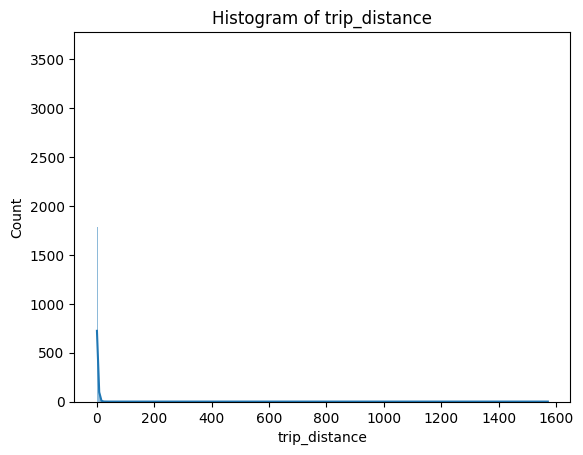

Shapiro-Wilk Test for trip_distance: Statistics=0.119, p=0.000
trip_distance tidak berdistribusi normal



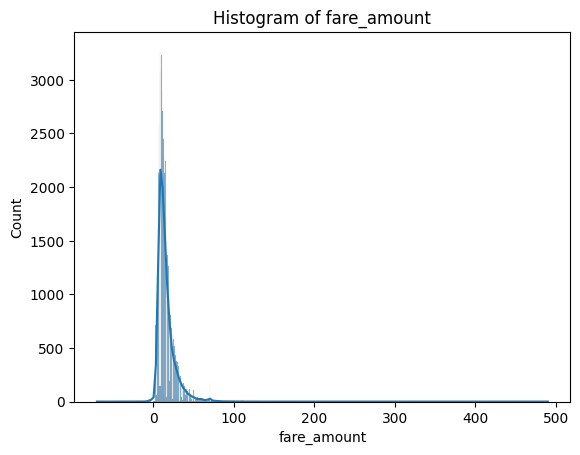

Shapiro-Wilk Test for fare_amount: Statistics=0.620, p=0.000
fare_amount tidak berdistribusi normal



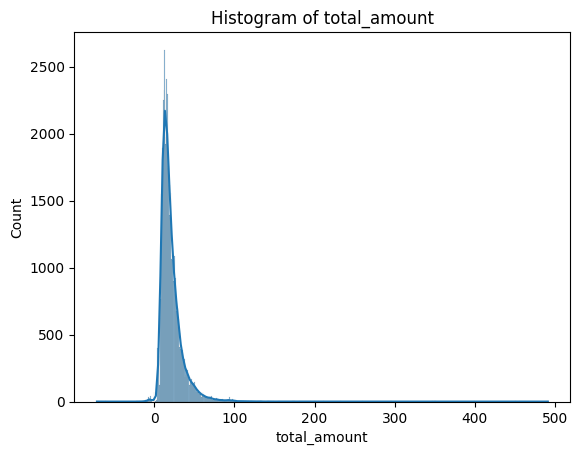

Shapiro-Wilk Test for total_amount: Statistics=0.684, p=0.000
total_amount tidak berdistribusi normal



In [12]:
# Kolom yang akan dianalisis
columns = ['trip_distance', 'fare_amount', 'total_amount']

# Loop melalui setiap kolom untuk analisis distribusi normal
for col in columns:
    # Histogram plot
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(df_cleaned[col])
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p={p:.3f}')

    # Kesimpulan
    if p > 0.05:
        print(f'{col} berdistribusi normal\n')
    else:
        print(f'{col} tidak berdistribusi normal\n')


# **4. Analisis Pertanyaan Berdasarkan Latar Belakang**
# **Pertanyaan 1: Bagaimana distribusi perjalanan berdasarkan waktu pickup?**

# *Langkah 1: Distribusi Harian*
Deskripsi: Analisis ini akan membantu memahami hari-hari dengan aktivitas transportasi yang tinggi.


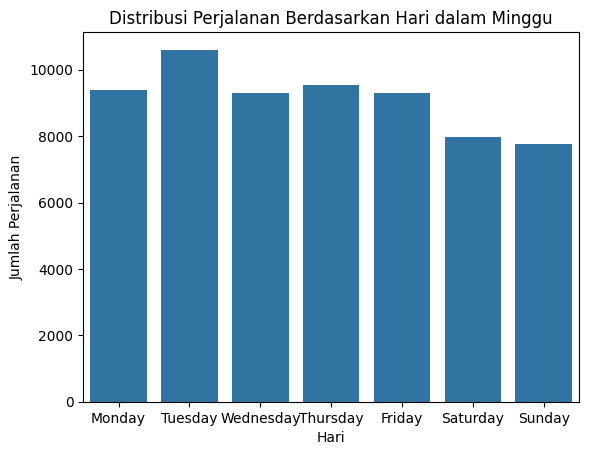

In [13]:
# Menambah kolom hari dalam minggu
df_cleaned['day_of_week'] = df_cleaned['lpep_pickup_datetime'].dt.day_name()

# Membuat histogram distribusi perjalanan berdasarkan hari dalam minggu
sns.countplot(x='day_of_week', data=df_cleaned, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribusi Perjalanan Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Perjalanan')
plt.show()


# *Langkah 2: Distribusi Harian Berdasarkan Jam*

Deskripsi: Analisis ini akan membantu mengidentifikasi jam sibuk dalam sehari.

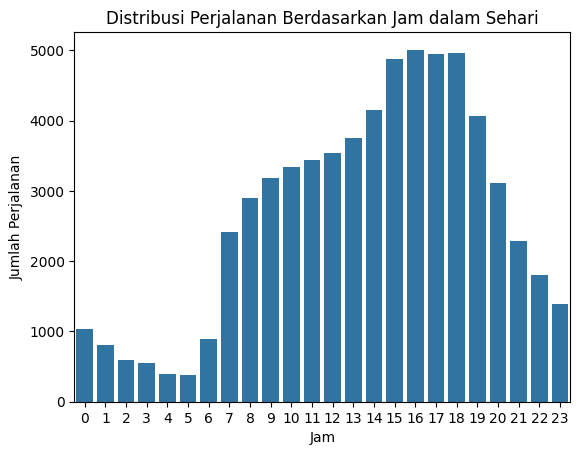

In [14]:
# Menambah kolom jam
df_cleaned['hour'] = df_cleaned['lpep_pickup_datetime'].dt.hour

# Membuat histogram distribusi perjalanan berdasarkan jam
sns.countplot(x='hour', data=df_cleaned)
plt.title('Distribusi Perjalanan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.show()


# *Langkah 3: Kombinasi Hari dan Jam*

Deskripsi: Kombinasi hari dan jam memberikan gambaran detail tentang waktu puncak penggunaan transportasi.

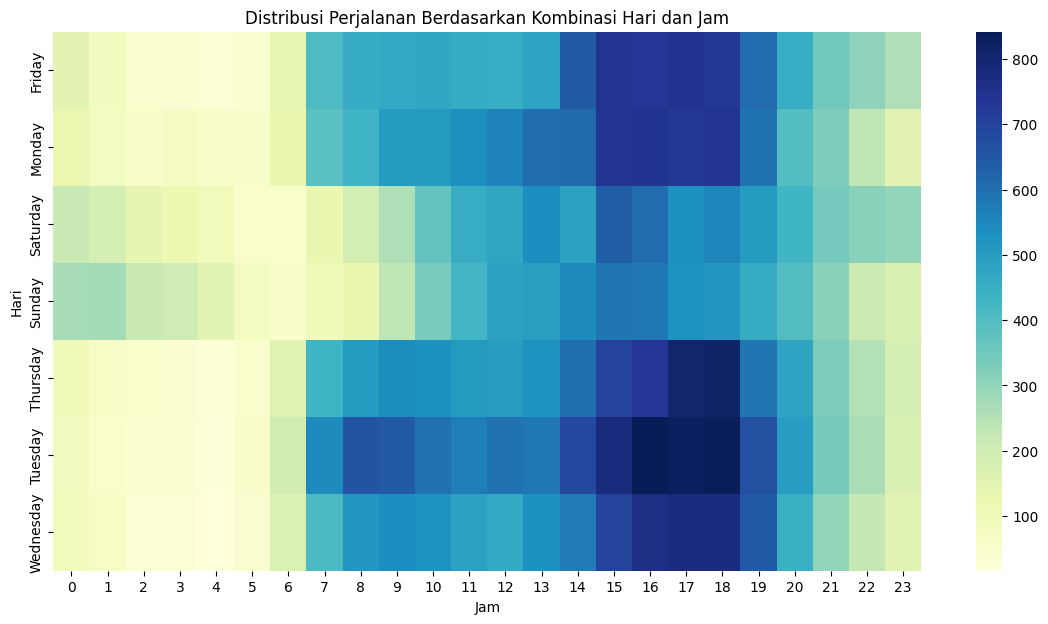

In [15]:
# Membuat pivot table untuk hari dan jam
pivot_table = df_cleaned.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

# Visualisasi heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Distribusi Perjalanan Berdasarkan Kombinasi Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()


# Visualisasi 1: Distribusi Perjalanan Berdasarkan Hari dalam Minggu

- Observasi: Terlihat bahwa hari Selasa memiliki jumlah perjalanan tertinggi, diikuti oleh Senin. Sedangkan hari Sabtu dan Minggu memiliki jumlah perjalanan terendah.
- Tren: Ini menunjukkan bahwa perjalanan taksi lebih banyak terjadi selama hari kerja dibandingkan dengan akhir pekan.
- Saran: Penambahan Armada: PT Hotel dapat mempertimbangkan untuk menambah armada taksi atau layanan transportasi selama hari kerja, terutama pada hari Senin dan Selasa untuk memenuhi permintaan yang lebih tinggi.
- Promosi Akhir Pekan: Untuk meningkatkan jumlah perjalanan pada akhir pekan, PT Hotel dapat menawarkan promosi atau diskon khusus pada hari Sabtu dan Minggu.

# Visualisasi 2: Distribusi Perjalanan Berdasarkan Jam dalam Sehari

- Observasi: Jumlah perjalanan meningkat secara bertahap dari jam 5 pagi dan mencapai puncaknya antara jam 15:00 hingga 18:00. Setelah itu, jumlah perjalanan mulai menurun hingga malam hari.
- Tren: Ini menunjukkan pola penggunaan taksi yang tinggi pada jam pulang kerja dan sore hari.
- Saran: Shift Kerja Fleksibel: PT Hotel dapat menyesuaikan shift kerja pengemudi taksi untuk memastikan ketersediaan maksimum selama jam sibuk, terutama antara jam 15:00 hingga 18:00.
- Penawaran Spesial: Menerapkan penawaran atau tarif khusus selama jam non-puncak untuk meratakan distribusi perjalanan sepanjang hari.

# Visualisasi 3: Distribusi Perjalanan Berdasarkan Kombinasi Hari dan Jam

- Observasi: Hari Jumat dan Senin memiliki aktivitas perjalanan tinggi sepanjang hari kerja. Pola puncak terlihat pada jam 15:00 hingga 18:00 selama hari kerja.
- Tren: Kombinasi hari dan jam menunjukkan bahwa hari kerja, terutama Senin dan Jumat, memiliki permintaan perjalanan yang tinggi selama jam sore.
- Saran: Optimalisasi Armada: PT Hotel dapat mengoptimalkan alokasi armada berdasarkan analisis ini, memastikan lebih banyak taksi tersedia pada hari dan jam puncak yang teridentifikasi.
- Perencanaan Sumber Daya: Menggunakan data ini untuk perencanaan sumber daya, termasuk pengaturan shift pengemudi, perawatan kendaraan, dan alokasi sumber daya operasional lainnya.

# ==========================================================================================

# **Pertanyaan 2: Adakah korelasi antara jumlah penumpang dan jarak perjalanan?**

# *Langkah 1: Distribusi Jumlah Penumpang*
Deskripsi: Mengetahui distribusi jumlah penumpang dapat membantu kita memahami pola perjalanan.

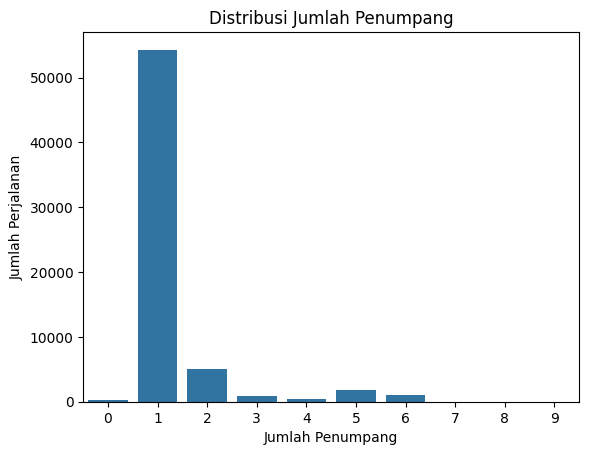

In [16]:
# Membuat histogram distribusi jumlah penumpang
sns.countplot(x='passenger_count', data=df_cleaned)
plt.title('Distribusi Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Jumlah Perjalanan')
plt.show()


# *Langkah 2: Rata-rata Jarak Perjalanan Berdasarkan Jumlah Penumpang*
Deskripsi: Analisis ini akan memberikan wawasan apakah perjalanan lebih panjang dengan lebih banyak penumpang atau tidak.

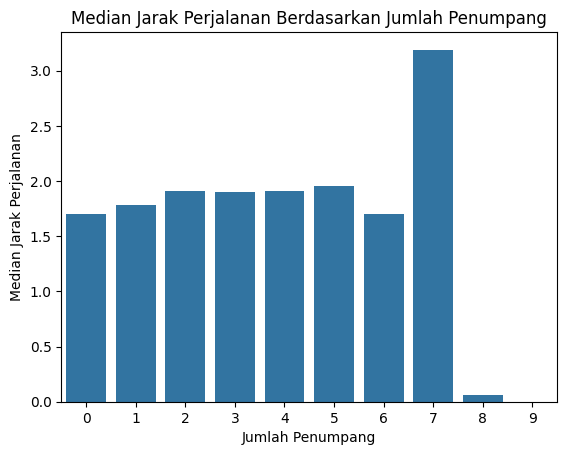

In [17]:
# Menghitung median jarak perjalanan berdasarkan jumlah penumpang
median_trip_distance = df_cleaned.groupby('passenger_count')['trip_distance'].median().reset_index()

# Visualisasi
sns.barplot(x='passenger_count', y='trip_distance', data=median_trip_distance)
plt.title('Median Jarak Perjalanan Berdasarkan Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Median Jarak Perjalanan')
plt.show()


# *Langkah 3: Korelasi Antara Jumlah Penumpang dan Jarak Perjalanan*
Deskripsi: Korelasi ini akan menunjukkan apakah ada hubungan yang signifikan antara jumlah penumpang dan jarak perjalanan.

Spearman Correlation: 0.03, p-value: 0.000
Korelasi antara jumlah penumpang dan jarak perjalanan adalah signifikan (Spearman).


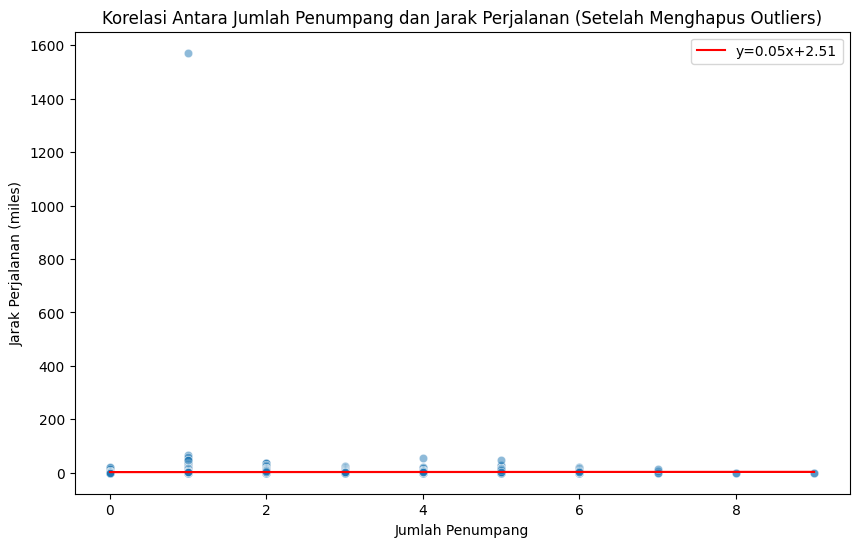

Linear Regression: slope=0.05, intercept=2.51, r_value=0.01, p_value=0.068


In [18]:
from scipy.stats import spearmanr, kendalltau, linregress

# Menghitung Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df_cleaned['passenger_count'], df_cleaned['trip_distance'])

# Menampilkan hasil Spearman
print(f'Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p_value:.3f}')

# Menentukan signifikansi
alpha = 0.05

if spearman_p_value < alpha:
    print('Korelasi antara jumlah penumpang dan jarak perjalanan adalah signifikan (Spearman).')
else:
    print('Korelasi antara jumlah penumpang dan jarak perjalanan tidak signifikan (Spearman).')


# Menghitung regresi linier
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['passenger_count'], df_cleaned['trip_distance'])

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='trip_distance', data=df_cleaned, alpha=0.5)

# Menambahkan garis regresi
plt.plot(df_cleaned['passenger_count'], intercept + slope * df_cleaned['passenger_count'], 'r', label=f'y={slope:.2f}x+{intercept:.2f}')
plt.title('Korelasi Antara Jumlah Penumpang dan Jarak Perjalanan (Setelah Menghapus Outliers)')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Jarak Perjalanan (miles)')
plt.legend()
plt.show()

# Menampilkan hasil regresi
print(f'Linear Regression: slope={slope:.2f}, intercept={intercept:.2f}, r_value={r_value:.2f}, p_value={p_value:.3f}')


# Visualisasi 1: Distribusi Jumlah Penumpang

- Observasi: Sebagian besar perjalanan dilakukan oleh satu penumpang, dengan jumlah perjalanan yang jauh lebih sedikit untuk dua penumpang atau lebih.
- Tren: Ini menunjukkan bahwa perjalanan taksi paling sering digunakan oleh individu tunggal.
- Saran: Optimalisasi Layanan: PT Hotel dapat mempertimbangkan untuk menyediakan layanan khusus atau promosi bagi penumpang tunggal, mengingat mereka merupakan mayoritas pengguna.
- Diversifikasi Layanan: Untuk menarik lebih banyak penumpang dalam satu perjalanan, PT Hotel dapat menawarkan diskon untuk kelompok atau layanan khusus untuk perjalanan bersama.

# Visualisasi 2: Median Jarak Perjalanan Berdasarkan Jumlah Penumpang

- Observasi: Median jarak perjalanan relatif konsisten di sekitar 2 mil untuk sebagian besar jumlah penumpang, tetapi terlihat ada peningkatan signifikan untuk perjalanan dengan 7 penumpang.
- Tren: Perjalanan dengan lebih banyak penumpang cenderung menempuh jarak yang lebih jauh.
- Saran: Penawaran Jarak Jauh: PT Hotel dapat menawarkan layanan khusus atau paket untuk perjalanan jarak jauh bagi kelompok besar, mengingat mereka cenderung melakukan perjalanan lebih jauh.
- Pemantauan Layanan: Perlu adanya pemantauan lebih lanjut terhadap perjalanan dengan 7 penumpang untuk memastikan tidak ada anomali data atau kebutuhan layanan khusus.

# Visualisasi 3: Korelasi Antara Jumlah Penumpang dan Jarak Perjalanan

- Observasi: Korelasi Spearman menunjukkan nilai korelasi 0.03 dengan p-value 0.000, menunjukkan bahwa meskipun korelasi antara jumlah penumpang dan jarak perjalanan signifikan secara statistik, kekuatannya sangat lemah.
- Tren: Garis regresi linier menunjukkan hubungan yang hampir datar, mengindikasikan bahwa jumlah penumpang memiliki pengaruh yang sangat kecil terhadap jarak perjalanan.
- Saran: Layanan Fleksibel: Meskipun ada korelasi yang signifikan secara statistik, pengaruh jumlah penumpang terhadap jarak perjalanan sangat kecil. PT Hotel dapat fokus pada fleksibilitas layanan yang dapat menyesuaikan dengan kebutuhan penumpang individual maupun kelompok.
- Analisis Tambahan: Perlu dilakukan analisis tambahan untuk mengidentifikasi faktor-faktor lain yang mungkin lebih berpengaruh terhadap jarak perjalanan, seperti waktu pickup, tujuan perjalanan, atau metode pembayaran.

# =================================================================================

# **Pertanyaan 3: Bagaimana distribusi biaya perjalanan (fare_amount) berdasarkan metode pembayaran?**

# *Langkah 1: Distribusi Biaya Perjalanan Berdasarkan Metode Pembayaran*
Deskripsi: Analisis ini akan membantu memahami preferensi metode pembayaran yang digunakan oleh penumpang.

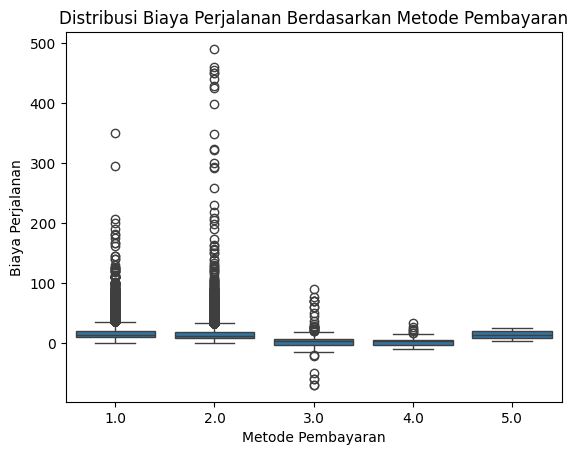

In [19]:
# Membuat boxplot distribusi biaya perjalanan berdasarkan metode pembayaran menggunakan df_cleaned
sns.boxplot(x='payment_type', y='fare_amount', data=df_cleaned)
plt.title('Distribusi Biaya Perjalanan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Biaya Perjalanan')
plt.show()

# *Langkah 2: Rata-rata Biaya Perjalanan Berdasarkan Metode Pembayaran*
Deskripsi: Analisis ini akan memberikan wawasan tentang median biaya perjalanan untuk setiap metode pembayaran.

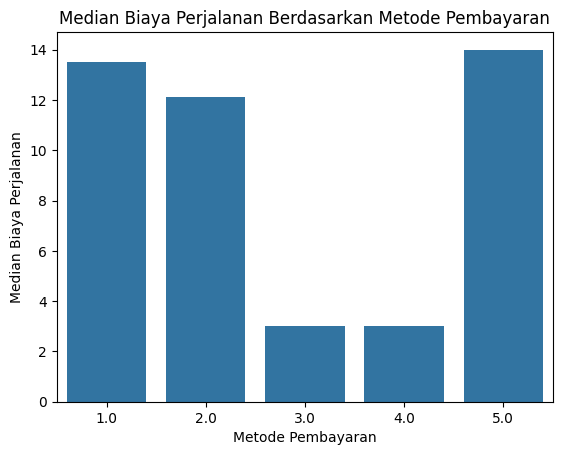

In [20]:
# Menghitung median biaya perjalanan berdasarkan metode pembayaran
median_fare_payment = df_cleaned.groupby('payment_type')['fare_amount'].median().reset_index()

# Visualisasi
sns.barplot(x='payment_type', y='fare_amount', data=median_fare_payment)
plt.title('Median Biaya Perjalanan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Median Biaya Perjalanan')
plt.show()


# *Langkah 3: Uji Statistik Non-parametrik*
Deskripsi: Menggunakan uji statistik non-parametrik untuk membandingkan biaya perjalanan antara berbagai metode pembayaran.

In [21]:
from scipy.stats import kruskal

# Melakukan uji Kruskal-Wallis untuk membandingkan biaya perjalanan berdasarkan metode pembayaran
kruskal_result = kruskal(df_cleaned[df_cleaned['payment_type'] == 1]['fare_amount'],
                         df_cleaned[df_cleaned['payment_type'] == 2]['fare_amount'],
                         df_cleaned[df_cleaned['payment_type'] == 3]['fare_amount'],
                         df_cleaned[df_cleaned['payment_type'] == 4]['fare_amount'],
                         df_cleaned[df_cleaned['payment_type'] == 5]['fare_amount'])

print(f'Uji Kruskal-Wallis: Statistics={kruskal_result.statistic:.2f}, p-value={kruskal_result.pvalue:.3f}')

# Menentukan signifikansi
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print('Terdapat perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran.')
else:
    print('Tidak terdapat perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran.')


Uji Kruskal-Wallis: Statistics=1456.92, p-value=0.000
Terdapat perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran.


# Visualisasi 1: Distribusi Biaya Perjalanan Berdasarkan Metode Pembayaran
Deskripsi:

- Observasi: Terlihat bahwa ada variasi biaya perjalanan untuk setiap metode pembayaran. Metode pembayaran dengan kode 1 dan 2 memiliki distribusi biaya yang lebih tinggi dan bervariasi dibandingkan dengan metode lainnya.
- Tren: Perbedaan dalam distribusi biaya perjalanan berdasarkan metode pembayaran menunjukkan preferensi yang berbeda dari penumpang dalam hal biaya yang dikeluarkan.

Saran:

- Analisis Lanjutan: PT Hotel dapat melakukan analisis lebih lanjut untuk memahami alasan di balik perbedaan biaya perjalanan berdasarkan metode pembayaran. Ini bisa melibatkan peninjauan rute, durasi perjalanan, atau kebiasaan pengguna.
- Optimisasi Metode Pembayaran: Berdasarkan hasil analisis, PT Hotel dapat mengoptimalkan metode pembayaran yang paling sering digunakan oleh penumpang untuk meningkatkan efisiensi dan kenyamanan.

# Visualisasi 2: Median Biaya Perjalanan Berdasarkan Metode Pembayaran
Deskripsi:

- Observasi: Median biaya perjalanan tertinggi ditemukan pada metode pembayaran dengan kode 1 dan 5, sedangkan median terendah ada pada kode 3 dan 4.
- Tren: Ini menunjukkan bahwa metode pembayaran tertentu lebih sering digunakan untuk perjalanan dengan biaya yang lebih tinggi.

Saran:

- Promosi Khusus: PT Hotel dapat menawarkan promosi atau insentif khusus untuk metode pembayaran dengan median biaya yang lebih rendah untuk meningkatkan penggunaannya.
- Penawaran Paket: Untuk metode pembayaran dengan biaya lebih tinggi, PT Hotel dapat menawarkan paket layanan premium yang mungkin lebih sesuai dengan preferensi penumpang tersebut.

# Observasi: Uji Kruskal-Wallis menunjukkan statistik sebesar 1456.92 dengan p-value 0.000, yang berarti terdapat perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran.
Deskripsi :
- Tren: Ini menunjukkan bahwa metode pembayaran memang mempengaruhi biaya perjalanan secara signifikan.

Saran:

- Strategi Pembayaran: PT Hotel dapat mengembangkan strategi pembayaran yang berbeda untuk setiap metode, mengoptimalkan tarif dan layanan untuk setiap segmen pengguna.
- Penyesuaian Harga: Dengan memahami perbedaan signifikan ini, PT Hotel dapat menyesuaikan harga atau biaya tambahan berdasarkan metode pembayaran untuk meningkatkan pendapatan dan kepuasan pelanggan.

# Kesimpulan dan Rekomendasi
- Analisis Mendalam: PT Hotel perlu melakukan analisis mendalam terhadap setiap metode pembayaran untuk memahami faktor-faktor yang mempengaruhi biaya perjalanan.
- Optimalisasi Layanan: Berdasarkan temuan ini, PT Hotel dapat mengoptimalkan layanan dan strategi harga untuk setiap metode pembayaran.
- Promosi dan Insentif: Menawarkan promosi dan insentif yang sesuai untuk mendorong penggunaan metode pembayaran tertentu yang lebih efisien.

# ======================================================================

# **Pertanyaan 4: Bagaimana pola perjalanan berdasarkan lokasi pickup dan dropoff?**

# *Langkah 1: Distribusi Lokasi Pickup*
Deskripsi: Mengetahui lokasi pickup yang paling sering digunakan oleh penumpang.

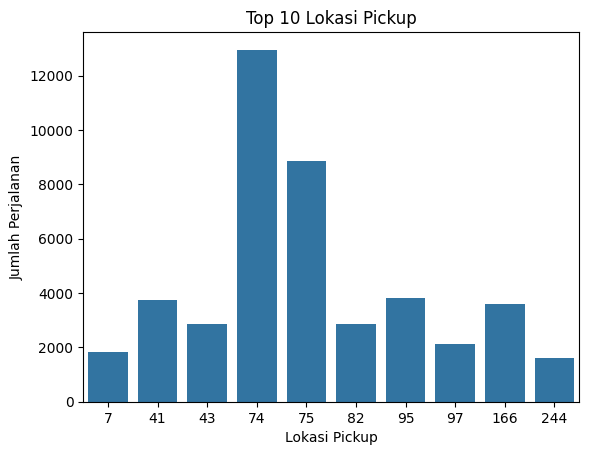

In [22]:
# Menghitung distribusi lokasi pickup
pickup_distribution = df_cleaned['PULocationID'].value_counts().reset_index()
pickup_distribution.columns = ['PULocationID', 'count']

# Visualisasi
sns.barplot(x='PULocationID', y='count', data=pickup_distribution.head(10))
plt.title('Top 10 Lokasi Pickup')
plt.xlabel('Lokasi Pickup')
plt.ylabel('Jumlah Perjalanan')
plt.show()


# *Langkah 2: Distribusi Lokasi Dropoff*
Deskripsi: Mengetahui lokasi dropoff yang paling sering digunakan oleh penumpang.

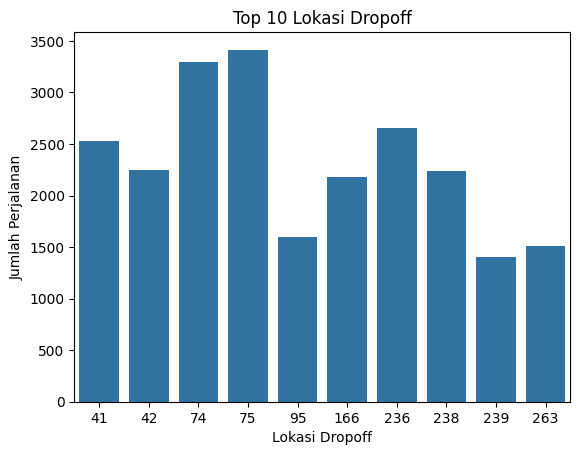

In [23]:
# Menghitung distribusi lokasi dropoff
dropoff_distribution = df_cleaned['DOLocationID'].value_counts().reset_index()
dropoff_distribution.columns = ['DOLocationID', 'count']

# Visualisasi
sns.barplot(x='DOLocationID', y='count', data=dropoff_distribution.head(10))
plt.title('Top 10 Lokasi Dropoff')
plt.xlabel('Lokasi Dropoff')
plt.ylabel('Jumlah Perjalanan')
plt.show()


# *Langkah 3: Analisis Kombinasi Lokasi Pickup dan Dropoff*
Deskripsi: Analisis ini akan membantu memahami pola perjalanan berdasarkan kombinasi lokasi pickup dan dropoff.

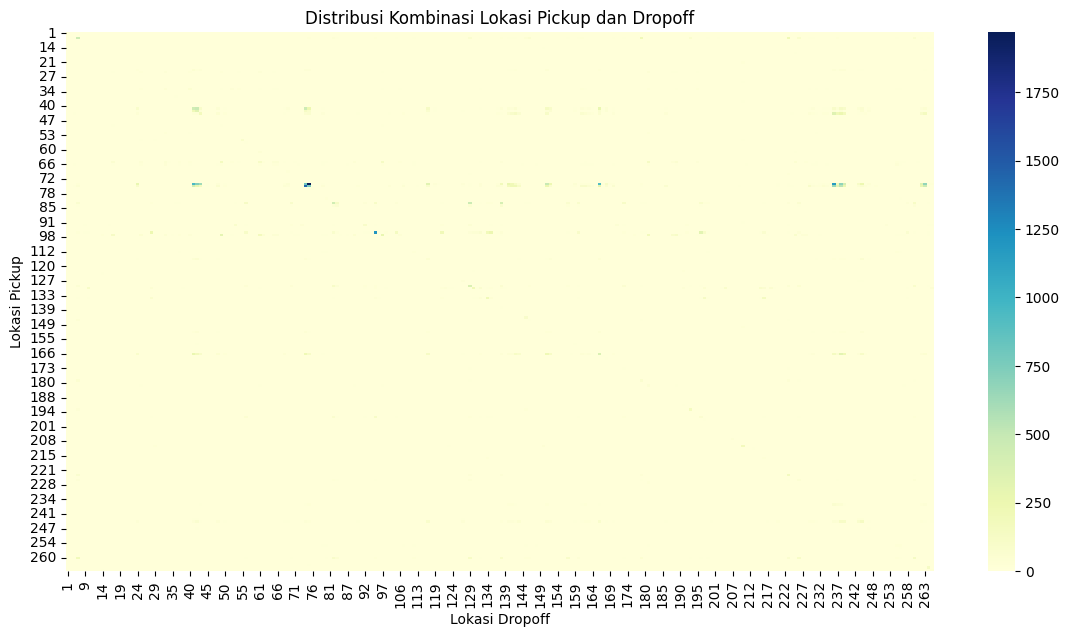

In [24]:
# Menghitung distribusi kombinasi lokasi pickup dan dropoff
pickup_dropoff_combination = df_cleaned.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

# Visualisasi heatmap untuk kombinasi lokasi pickup dan dropoff menggunakan pivot_table
pickup_dropoff_pivot = pickup_dropoff_combination.pivot_table(index='PULocationID', columns='DOLocationID', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pickup_dropoff_pivot, cmap='YlGnBu')
plt.title('Distribusi Kombinasi Lokasi Pickup dan Dropoff')
plt.xlabel('Lokasi Dropoff')
plt.ylabel('Lokasi Pickup')
plt.show()


# Langkah 1: Top 10 Lokasi Pickup
Deskripsi:

- Observasi: Lokasi pickup dengan kode 74 dan 75 memiliki jumlah perjalanan tertinggi. Lokasi-lokasi lain memiliki jumlah perjalanan yang lebih rendah tetapi signifikan.
- Tren: Ini menunjukkan bahwa ada beberapa hotspot utama di mana penumpang sering memulai perjalanan mereka.

Tindakan Spesifik:

- Penempatan Armada: Menempatkan lebih banyak taksi di lokasi pickup utama (kode 74 dan 75) selama jam sibuk untuk mengurangi waktu tunggu penumpang dan meningkatkan efisiensi operasional.
- Stasiun Penjemputan: Mendirikan stasiun penjemputan khusus di lokasi-lokasi dengan volume tinggi untuk memberikan kenyamanan tambahan bagi penumpang dan meningkatkan koordinasi pengemudi.

# Langkah 2: Top 10 Lokasi Dropoff
Deskripsi:

- Observasi: Lokasi dropoff dengan kode 74 dan 75 juga memiliki jumlah perjalanan tertinggi, menunjukkan pola yang mirip dengan lokasi pickup.
- Tren: Ini mengindikasikan bahwa beberapa area berfungsi sebagai pusat aktivitas utama untuk penumpang.

Tindakan Spesifik:

- Optimalisasi Rute: Menggunakan data ini untuk merencanakan rute optimal yang menghubungkan lokasi-lokasi pickup dan dropoff utama, mengurangi waktu tempuh dan meningkatkan kepuasan penumpang.
- Promosi di Area Tertentu: Melakukan kampanye promosi di lokasi dropoff utama untuk menarik lebih banyak penumpang dan meningkatkan penggunaan layanan di area tersebut.

# Langkah 3: Distribusi Kombinasi Lokasi Pickup dan Dropoff
Deskripsi:

- Observasi: Heatmap menunjukkan beberapa kombinasi lokasi pickup dan dropoff yang sering digunakan, meskipun distribusi keseluruhan cukup tersebar.
- Tren: Ini menunjukkan pola perjalanan umum di antara lokasi-lokasi utama yang dapat dioptimalkan.

Tindakan Spesifik:

- Layanan Shuttle: Menerapkan layanan shuttle atau transportasi terjadwal antara lokasi pickup dan dropoff yang paling sering digunakan untuk meningkatkan efisiensi.
- Penyesuaian Tarif: Menyesuaikan tarif berdasarkan pola perjalanan utama ini untuk memaksimalkan pendapatan dan menawarkan harga yang kompetitif bagi penumpang.

# **5. Apakah terdapat perbedaan signifikan dalam tarif perjalanan (fare_amount) berdasarkan lokasi pickup?**

# *Langkah 1: Distribusi Tarif Perjalanan Berdasarkan Lokasi Pickup*

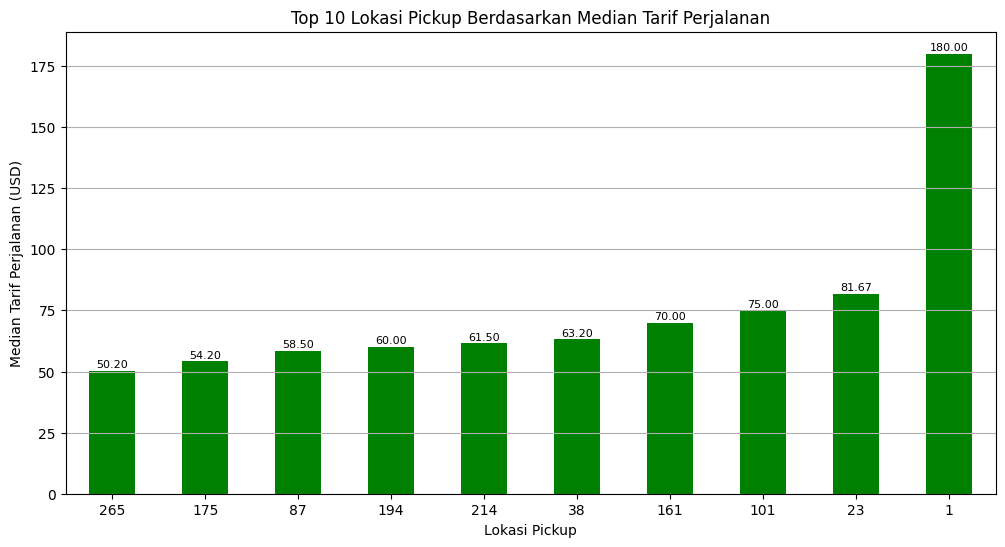

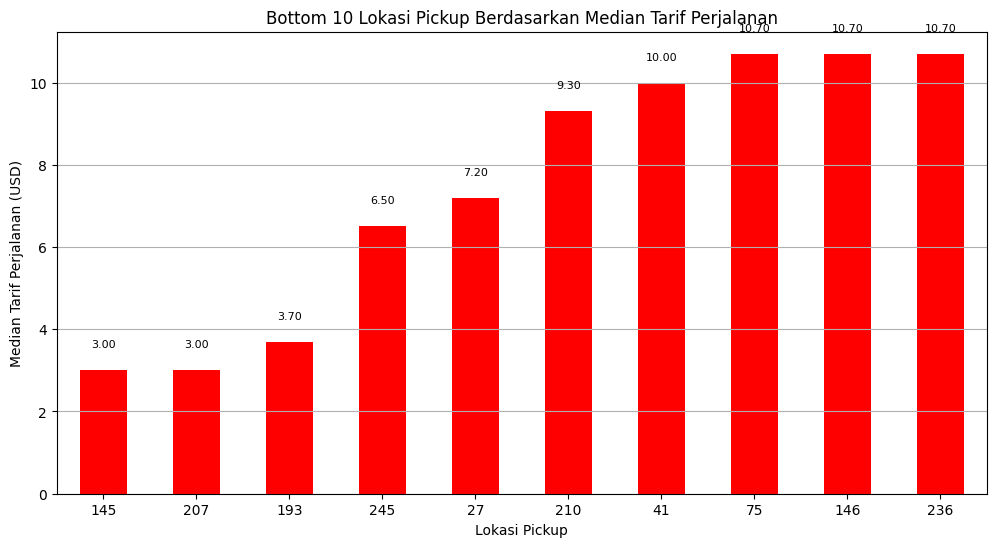

In [26]:
# Pastikan kolom lokasi pickup dalam format kategori
df_cleaned['PULocationID'] = df_cleaned['PULocationID'].astype('category')

# Hitung median tarif perjalanan berdasarkan lokasi pickup
fare_by_pickup_location = df_cleaned.groupby('PULocationID')['fare_amount'].median().sort_values()

# Ambil top 10 dan bottom 10 lokasi berdasarkan median tarif
top_10_locations = fare_by_pickup_location.tail(10)
bottom_10_locations = fare_by_pickup_location.head(10)

# Plot top 10 lokasi
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='green')
plt.title('Top 10 Lokasi Pickup Berdasarkan Median Tarif Perjalanan')
plt.xlabel('Lokasi Pickup')
plt.ylabel('Median Tarif Perjalanan (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add labels
for index, value in enumerate(top_10_locations):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

# Plot bottom 10 lokasi
plt.figure(figsize=(12, 6))
bottom_10_locations.plot(kind='bar', color='red')
plt.title('Bottom 10 Lokasi Pickup Berdasarkan Median Tarif Perjalanan')
plt.xlabel('Lokasi Pickup')
plt.ylabel('Median Tarif Perjalanan (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add labels
for index, value in enumerate(bottom_10_locations):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()


In [27]:
# Uji Kruskal-Wallis untuk menentukan perbedaan signifikan
kruskal_result = stats.kruskal(*[group["fare_amount"].values for name, group in df_cleaned.groupby("PULocationID")])

# Hipotesis
H0 = "Tidak ada perbedaan signifikan dalam tarif perjalanan berdasarkan lokasi pickup."
H1 = "Ada perbedaan signifikan dalam tarif perjalanan berdasarkan lokasi pickup."

# Tingkat Signifikansi
alpha = 0.05

# Hasil Uji
print(f"Kruskal-Wallis H Test Statistic: {kruskal_result.statistic:.2f}")
print(f"P-Value: {kruskal_result.pvalue:.4f}")

if kruskal_result.pvalue < alpha:
    print(f"Tolak H0: {H1}")
else:
    print(f"Gagal menolak H0: {H0}")


Kruskal-Wallis H Test Statistic: 5672.40
P-Value: 0.0000
Tolak H0: Ada perbedaan signifikan dalam tarif perjalanan berdasarkan lokasi pickup.


## langkah 1: Distribusi Tarif Perjalanan Berdasarkan Lokasi Pickup (Top 10 dan Bottom 10)

### Deskripsi:
- **Observasi**: Lokasi pickup dengan median tarif perjalanan tertinggi cenderung berada di area dengan permintaan tinggi atau perjalanan jarak jauh. Sebaliknya, lokasi dengan median tarif terendah sering berada di area dengan perjalanan singkat atau permintaan rendah.
- **Tren**: Distribusi median tarif perjalanan menunjukkan variasi yang signifikan berdasarkan lokasi pickup. Ini mencerminkan perbedaan geografis dalam pola penggunaan taksi dan kondisi ekonomi wilayah tersebut.

### Saran:
- **Penambahan Armada di Area Strategis**: PT Hotel dapat menambah jumlah armada di lokasi dengan median tarif tinggi untuk meningkatkan ketersediaan layanan di area dengan permintaan tinggi.
- **Analisis Rute dan Durasi**: Lakukan analisis lebih lanjut untuk memahami faktor-faktor seperti rute yang diambil dan durasi perjalanan di lokasi-lokasi dengan median tarif tinggi dan rendah.
- **Penyesuaian Tarif**: Evaluasi dan sesuaikan tarif di lokasi dengan median tarif rendah untuk memastikan kesesuaian dengan jarak dan waktu tempuh perjalanan.

### Aksi:
1. **Implementasi Penambahan Armada**: Segera tambahkan armada di area strategis dengan median tarif tinggi untuk menangani lonjakan permintaan.
2. **Pelatihan Pengemudi**: Lakukan pelatihan bagi pengemudi mengenai rute optimal dan layanan pelanggan di lokasi-lokasi dengan permintaan tinggi.
3. **Promosi di Area Tarif Rendah**: Berikan promosi dan insentif khusus untuk menarik lebih banyak pengguna di area dengan median tarif rendah.

## langkah 2: Uji Statistik Non-parametrik (Kruskal-Wallis)

### Deskripsi:
- **Observasi**: Uji Kruskal-Wallis menunjukkan bahwa terdapat perbedaan signifikan dalam tarif perjalanan berdasarkan lokasi pickup, dengan nilai p yang sangat rendah.
- **Tren**: Perbedaan signifikan dalam tarif perjalanan menunjukkan bahwa faktor geografis dan ekonomi lokal mempengaruhi tarif secara substansial.

### Saran:
- **Penetapan Tarif Berdasarkan Lokasi**: PT Hotel dapat menerapkan strategi penetapan tarif yang berbeda untuk setiap lokasi pickup. Lokasi dengan permintaan rendah bisa mendapatkan penyesuaian tarif untuk menarik lebih banyak penumpang, sementara lokasi dengan permintaan tinggi bisa mempertahankan tarif premium.
- **Penyesuaian Harga Dinamis**: Implementasi penyesuaian harga dinamis berdasarkan waktu dan permintaan di lokasi-lokasi tertentu untuk memaksimalkan pendapatan.

### Aksi:
1. **Implementasi Tarif Berdasarkan Lokasi**: Sesuaikan tarif secara langsung di sistem untuk lokasi-lokasi pickup berdasarkan temuan ini.
2. **Pemantauan dan Evaluasi**: Buat tim khusus untuk memantau efektivitas tarif baru dan melakukan penyesuaian berdasarkan data real-time.
3. **Kampanye Pemasaran**: Luncurkan kampanye pemasaran yang menargetkan area dengan tarif lebih rendah untuk meningkatkan visibilitas dan penggunaan layanan.

## Kesimpulan dan Rekomendasi
- **Analisis Mendalam**: PT Hotel perlu melakukan analisis mendalam terhadap setiap lokasi pickup untuk memahami faktor-faktor yang mempengaruhi tarif perjalanan, seperti jarak rata-rata perjalanan, durasi perjalanan, dan rute yang diambil.
- **Optimalisasi Layanan**: Berdasarkan temuan ini, PT Hotel dapat mengoptimalkan layanan dan strategi harga untuk setiap lokasi pickup, seperti meningkatkan ketersediaan armada di lokasi dengan permintaan tinggi dan menerapkan penyesuaian tarif di lokasi dengan tarif lebih rendah.
- **Promosi dan Insentif**: Menawarkan promosi dan insentif yang sesuai untuk mendorong penggunaan layanan di lokasi pickup tertentu yang lebih efisien, meningkatkan pemanfaatan armada secara keseluruhan dan kepuasan pelanggan.

### Tindakan Langsung:
1. **Penambahan Armada di Lokasi Strategis**: Tambahkan armada segera di area dengan median tarif tinggi.
2. **Pelatihan dan Orientasi Pengemudi**: Lakukan pelatihan rute optimal untuk pengemudi di area dengan permintaan tinggi.
3. **Penyesuaian Tarif Dinamis**: Terapkan sistem tarif dinamis berdasarkan waktu dan permintaan di lokasi-lokasi tertentu.
4. **Kampanye Promosi di Area Tarif Rendah**: Jalankan kampanye promosi yang menargetkan area dengan median tarif rendah untuk meningkatkan visibilitas dan penggunaan layanan.
